# Problem Statement: 
---
**Predict car usage:**
- Describe the historical car usage profile of RUM by type
    - Are the rates of changes in inventory correlated between car types?
- Based on available inventory, predict: 
    - How long will new cars sit by car type
    - How much will it cost to keep each type of car at RUM after it is sent there
- Just for A and B cars, find patterns in car type (ie B357) usage
    - how long they sit
---


In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [3]:
%matplotlib notebook


In [4]:
fn = r"C:\Users\Lenovo Thinkpad W520\Documents\Data Science\Projects\Final Project\Datasets\Online Snapshot.xlsx"
df = pd.read_excel(fn)
df

,Equipment ID,LE Status,AAR Car Type,AAR Car Kind,AAR Car Type Description,System Car,Length,Feet,Inches,Bad Order Ind,...,Placement Ind,Constructive Placement Ind,Received Date,Received Time,Hours at Station,Dwell Hours,Storage Ind,Car Hire Rate,Create Date,Create Time
0,CAR1 0594,E,B357,B,Box Cars,N,5507,55,7,,...,Y,N,2018-07-03,1050.0,24,7.283333,,0.64,2018-08-17,617
1,CAR1 0594,E,B357,B,Box Cars,N,5507,55,7,,...,Y,N,2018-07-03,1050.0,48,31.116667,,0.64,2018-08-18,607
2,CAR1 0594,E,B357,B,Box Cars,N,5507,55,7,,...,Y,N,2018-07-03,1050.0,73,55.950000,,0.64,2018-08-19,657
3,CAR1 0594,L,B357,B,Box Cars,N,5507,55,7,,...,N,N,2018-07-03,1050.0,96,11.300000,,0.64,2018-08-20,608
4,CAR1 0594,L,B357,B,Box Cars,N,5507,55,7,,...,N,N,2018-07-03,1050.0,0,0.916667,,0.64,2018-08-21,616
5,CAR1 0594,E,B357,B,Box Cars,N,5507,55,7,,...,N,Y,2018-09-05,1931.0,15,12.233333,,0.64,2018-09-12,608
6,CAR1 0594,E,B357,B,Box Cars,N,5507,55,7,,...,Y,N,2018-09-05,1931.0,39,17.183333,,0.64,2018-09-13,611
7,CAR1 0594,L,B357,B,Box Cars,N,5507,55,7,,...,N,N,2018-09-05,1931.0,63,6.316667,Y,0.64,2018-09-14,611
8,CAR1 0594,L,B357,B,Box Cars,N,5507,55,7,,...,N,N,2018-09-05,1931.0,87,30.266667,Y,0.64,2018-09-15,608
9,CAR1 0594,L,B357,B,Box Cars,N,5507,55,7,,...,N,N,2018-09-05,1931.0,112,6.650000,,0.64,2018-09-16,659


In [5]:
df_clean = df[df['AAR Car Kind'] != ' ']
df_clean

,Equipment ID,LE Status,AAR Car Type,AAR Car Kind,AAR Car Type Description,System Car,Length,Feet,Inches,Bad Order Ind,...,Placement Ind,Constructive Placement Ind,Received Date,Received Time,Hours at Station,Dwell Hours,Storage Ind,Car Hire Rate,Create Date,Create Time
0,CAR1 0594,E,B357,B,Box Cars,N,5507,55,7,,...,Y,N,2018-07-03,1050.0,24,7.283333,,0.64,2018-08-17,617
1,CAR1 0594,E,B357,B,Box Cars,N,5507,55,7,,...,Y,N,2018-07-03,1050.0,48,31.116667,,0.64,2018-08-18,607
2,CAR1 0594,E,B357,B,Box Cars,N,5507,55,7,,...,Y,N,2018-07-03,1050.0,73,55.950000,,0.64,2018-08-19,657
3,CAR1 0594,L,B357,B,Box Cars,N,5507,55,7,,...,N,N,2018-07-03,1050.0,96,11.300000,,0.64,2018-08-20,608
4,CAR1 0594,L,B357,B,Box Cars,N,5507,55,7,,...,N,N,2018-07-03,1050.0,0,0.916667,,0.64,2018-08-21,616
5,CAR1 0594,E,B357,B,Box Cars,N,5507,55,7,,...,N,Y,2018-09-05,1931.0,15,12.233333,,0.64,2018-09-12,608
6,CAR1 0594,E,B357,B,Box Cars,N,5507,55,7,,...,Y,N,2018-09-05,1931.0,39,17.183333,,0.64,2018-09-13,611
7,CAR1 0594,L,B357,B,Box Cars,N,5507,55,7,,...,N,N,2018-09-05,1931.0,63,6.316667,Y,0.64,2018-09-14,611
8,CAR1 0594,L,B357,B,Box Cars,N,5507,55,7,,...,N,N,2018-09-05,1931.0,87,30.266667,Y,0.64,2018-09-15,608
9,CAR1 0594,L,B357,B,Box Cars,N,5507,55,7,,...,N,N,2018-09-05,1931.0,112,6.650000,,0.64,2018-09-16,659


In [6]:
df_blanks = df[df['AAR Car Kind'] == ' ']
df_blanks

,Equipment ID,LE Status,AAR Car Type,AAR Car Kind,AAR Car Type Description,System Car,Length,Feet,Inches,Bad Order Ind,...,Placement Ind,Constructive Placement Ind,Received Date,Received Time,Hours at Station,Dwell Hours,Storage Ind,Car Hire Rate,Create Date,Create Time
384,CAR12 0077,L,,,Other,Y,5000,50,0,,...,N,Y,2014-06-06,935.0,7,-0.183333,,0.0,2018-06-11,612
385,CAR12 0077,L,,,Other,Y,5000,50,0,,...,Y,N,2014-06-06,935.0,31,19.216667,,0.0,2018-06-12,613
386,CAR12 0077,L,,,Other,Y,5000,50,0,,...,Y,N,2014-06-06,935.0,55,43.200000,,0.0,2018-06-13,612
387,CAR12 0077,L,,,Other,Y,5000,50,0,,...,Y,N,2014-06-06,935.0,79,67.216667,,0.0,2018-06-14,613
388,CAR12 0077,E,,,Other,Y,5000,50,0,,...,N,N,2014-06-06,935.0,103,10.750000,,0.0,2018-06-15,613
645,CAR12 0213,L,,,Other,Y,5000,50,0,,...,N,Y,2016-09-06,1002.0,4,2.533333,,0.0,2018-03-08,648
646,CAR12 0213,L,,,Other,Y,5000,50,0,,...,N,Y,2016-09-06,1002.0,28,17.250000,,0.0,2018-03-09,700
647,CAR12 0213,L,,,Other,Y,5000,50,0,,...,N,Y,2016-09-06,1002.0,52,40.550000,,0.0,2018-03-10,618
648,CAR12 0213,L,,,Other,Y,5000,50,0,,...,N,Y,2016-09-06,1002.0,77,65.933333,,0.0,2018-03-11,741
649,CAR12 0213,L,,,Other,Y,5000,50,0,,...,N,Y,2016-09-06,1002.0,100,88.583333,,0.0,2018-03-12,620


---
# RUM Car Inventroy vs Time
---

In [7]:
df_gb = df_clean.groupby('Create Date')['AAR Car Kind'].value_counts()
df_gb

df3 = pd.DataFrame({'labels':df_gb.index.labels[0]})
dates = df3.replace(df3['labels'].unique(),df_gb.index.levels[0])
len(dates)

df4 = pd.DataFrame({'labels':df_gb.index.labels[1]})
car_types = df4.replace(df4['labels'].unique(),df_gb.index.levels[1])
len(car_types)

df5 = pd.DataFrame({'labels':df_gb.values})
len(df5['labels'])
df5.shape

df_clean

df_clean2 = pd.DataFrame({'Date':dates['labels'],'Car_type':car_types['labels'],'count':df5['labels']})
df_clean2

,Date,Car_type,count
0,2017-09-24,A,126
1,2017-09-24,B,76
2,2017-09-24,C,14
3,2017-09-24,D,5
4,2017-09-24,E,2
5,2017-09-24,F,1
6,2017-09-24,G,1
7,2017-09-24,H,1
8,2017-09-25,A,126
9,2017-09-25,B,76


<IPython.core.display.Javascript object>


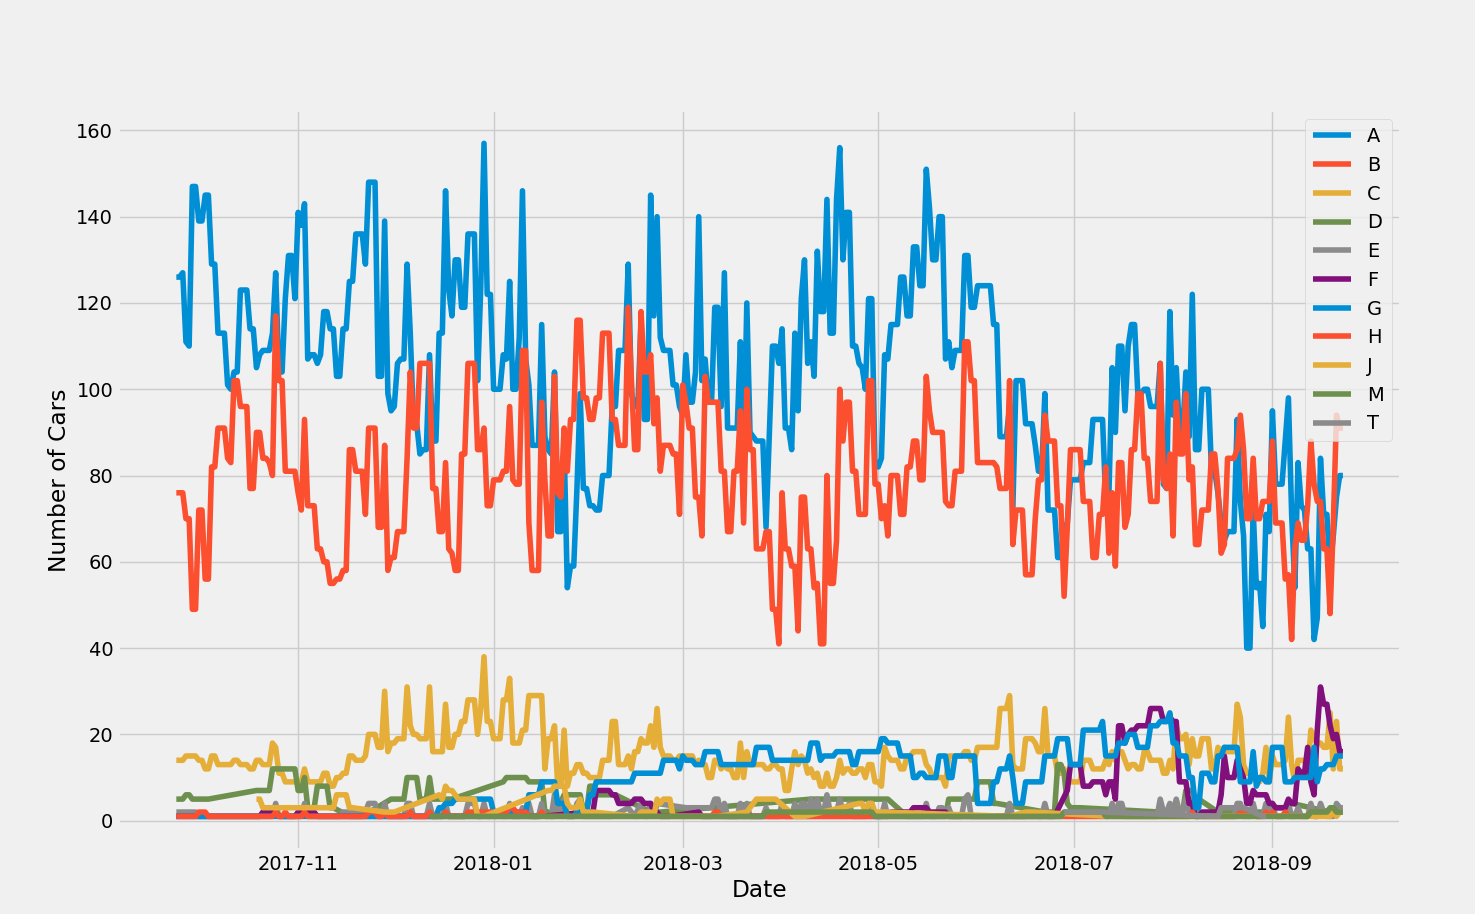

In [323]:
df_gb2 = df_clean2.groupby('Car_type')

fig, ax = plt.subplots()

for car in df_gb2.indices.keys():
    ax.plot(df_gb2.get_group(car)['Date'],df_gb2.get_group(car)['count'], label = car)

    
ax.set_ylabel('Number of Cars')
ax.set_xlabel('Date')    
leg = ax.legend()

---
# RUM Inventory Distributions by Car Kind
---

<IPython.core.display.Javascript object>


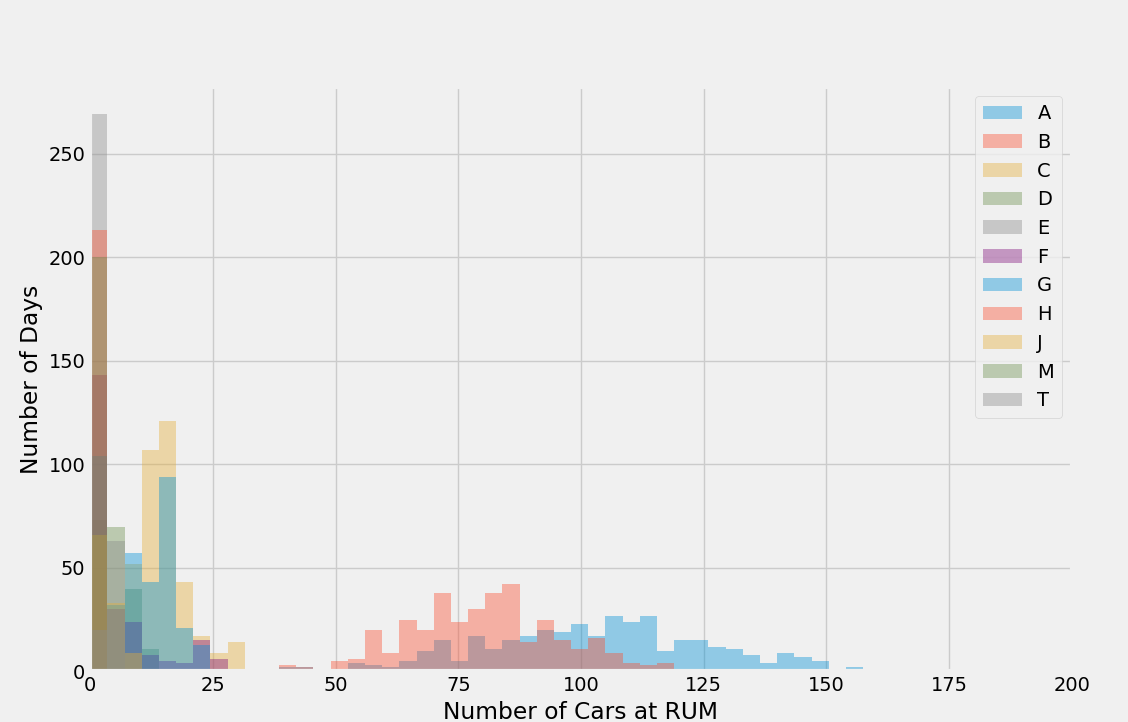

C:\Users\Lenovo Thinkpad W520\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Lenovo Thinkpad W520\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Lenovo Thinkpad W520\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Lenovo Thinkpad W520\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users

In [206]:
fig, ax = plt.subplots()

#df_gb_car_type = df_clean.groupby('AAR Car Kind')['Hours at Station']
bins = 50
hist_kws = {'range': (0,175)}

for car in df_gb2.indices.keys():
#     ax.hist(df_gb2.get_group(car)['count'], label = car, bins = bins, range=(0,175))
    sns.distplot(df_gb2.get_group(car)['count'], label = car, bins = bins, hist_kws = hist_kws, kde = 0)

ax.set_xlim(0,200)
ax.set_xlabel('Number of Cars at RUM')
ax.set_ylabel('Number of Days')


leg = ax.legend()

---
## Does the total inventory change over time?

The average number of cars at RUM this past year is 217 cars. (median = 218). It has had at most 300 cars and a minimum of 136. 

-----

In [10]:
df_gb3 = df_clean2.groupby('Date')['count'].sum()

### Total inventory vs time

<IPython.core.display.Javascript object>


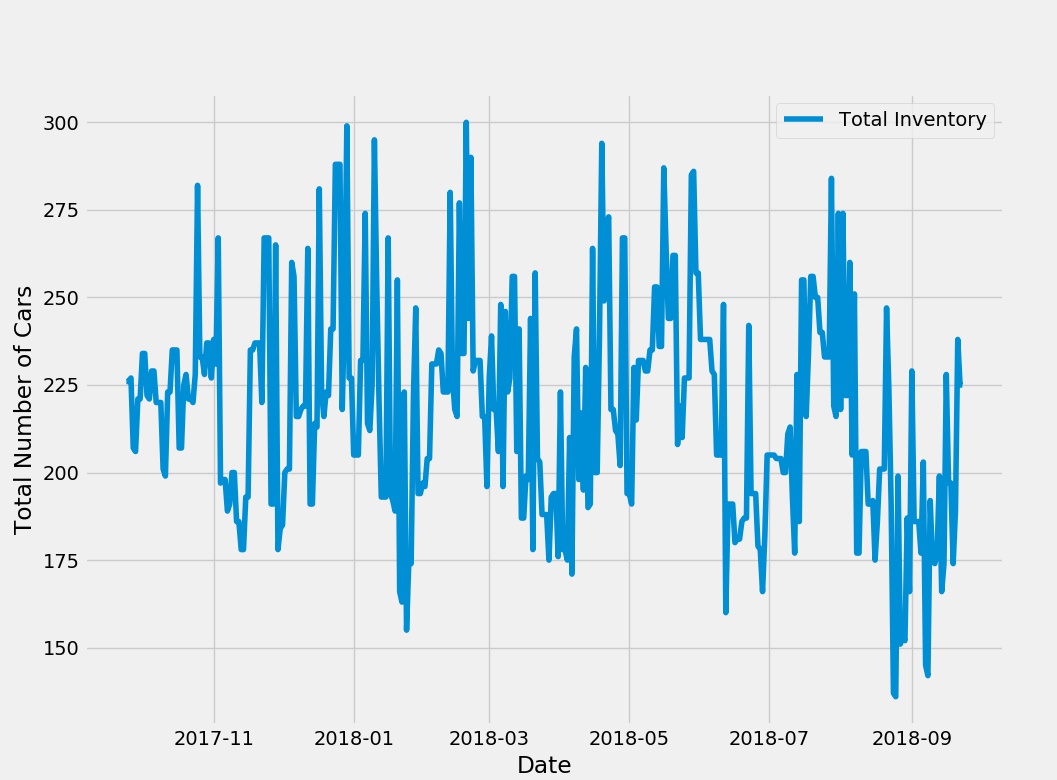

In [11]:
fig, ax = plt.subplots()

ax.plot(df_gb3, label = 'Total Inventory')
ax.set_ylabel('Total Number of Cars')
ax.set_xlabel('Date')

leg = ax.legend()

### Distribution of Total Inventory

<IPython.core.display.Javascript object>


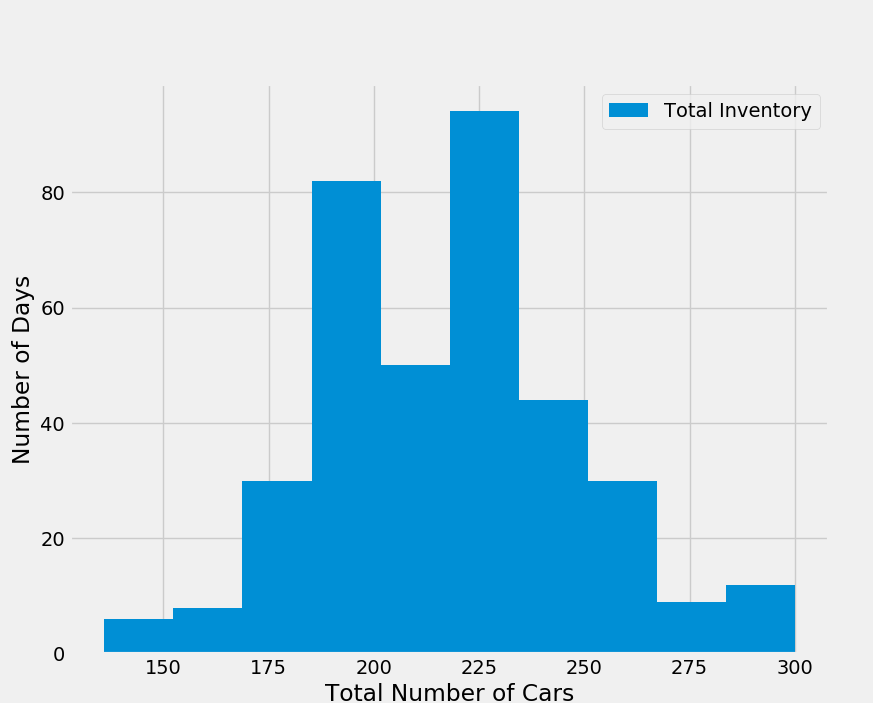

In [12]:
fig, ax = plt.subplots()

ax.hist(df_gb3, label = 'Total Inventory')
ax.set_ylabel('Number of Days')
ax.set_xlabel('Total Number of Cars')

leg = ax.legend()

In [207]:
df_gb3.describe()

count    365.000000
mean     217.410959
std       30.716908
min      136.000000
25%      194.000000
50%      218.000000
75%      235.000000
max      300.000000
Name: count, dtype: float64

# Relative Inventory vs Time by Kind

In [297]:
rel_stocks = [[]]*(len(df_gb2.indices.keys()))
len(rel_stocks)

11

In [320]:
len(rel_stocks[2])

365

In [311]:
365*11

4015

In [318]:
rel_stocks = [[]]*(len(df_gb2.indices.keys()))

#for date in df_gb3.keys():
i=0
for kind in df_gb2.indices.keys():
#         print(kind)
#         print(date)
#         print(df_gb2.get_group(kind)['count'][df_gb2.get_group(kind)['Date']==date])
    rel_stocks[i]= df_gb2.get_group(kind)['count'][df_gb2.get_group(kind)['Date'].isin(list(df_gb3.keys()))]/df_gb3[date]*100
    i=i+1
rel_stocks[0]

0       56.000000
8       56.000000
16      56.444444
24      49.333333
32      48.888889
40      65.333333
48      65.333333
56      61.777778
63      61.777778
70      64.444444
77      64.444444
84      57.333333
90      57.333333
96      50.222222
102     50.222222
108     50.222222
114     44.888889
120     44.444444
126     46.222222
132     46.222222
138     54.666667
144     54.666667
150     54.666667
156     50.666667
163     50.666667
170     46.666667
179     48.000000
188     48.444444
197     48.444444
206     48.444444
          ...    
2505    17.777778
2512    32.000000
2520    24.000000
2528    24.444444
2536    20.000000
2546    31.555556
2556    29.777778
2563    42.222222
2572    34.666667
2581    34.666667
2590    34.666667
2599    39.111111
2608    43.555556
2617    31.555556
2626    24.000000
2632    36.888889
2639    32.444444
2646    32.000000
2654    28.000000
2662    28.000000
2670    18.666667
2678    20.888889
2686    37.333333
2695    31.555556
2704    31

<IPython.core.display.Javascript object>


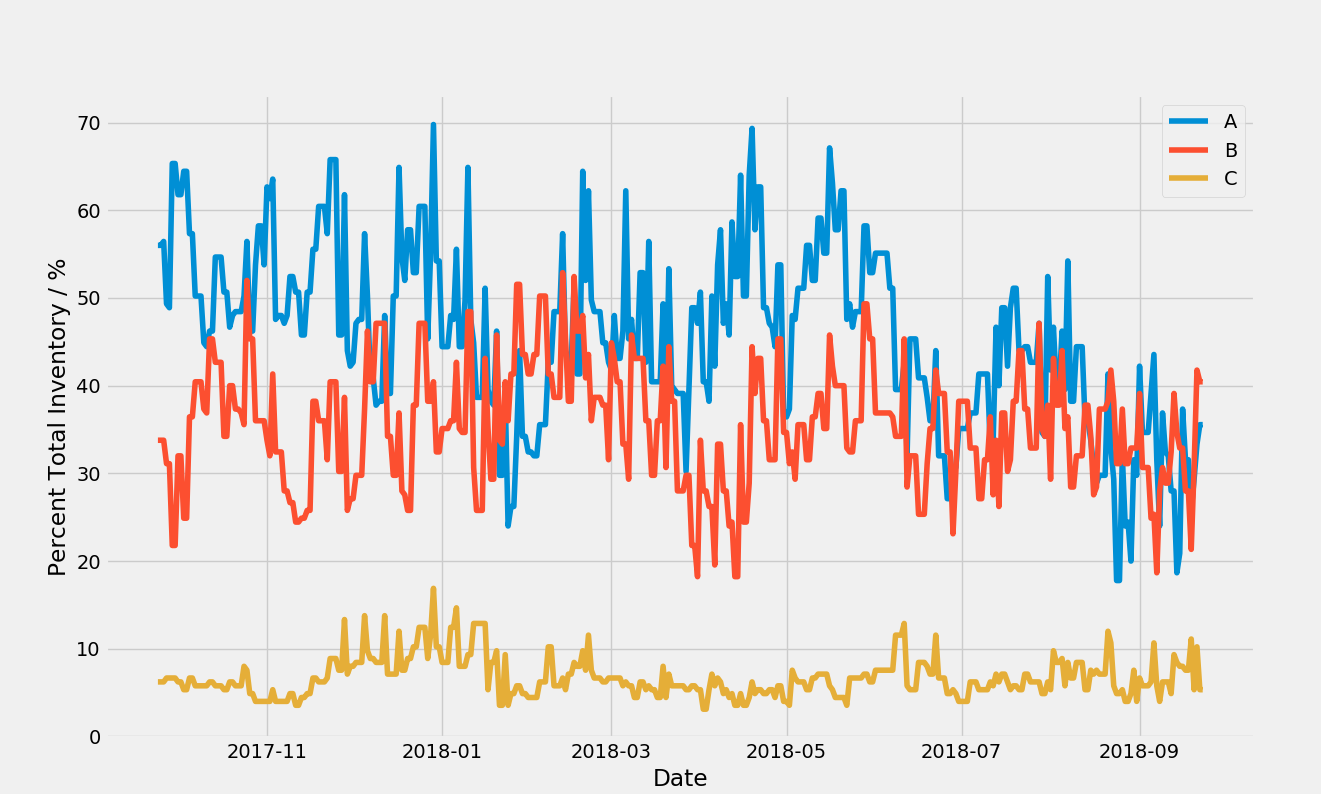

In [349]:
fig, ax = plt.subplots()

ax.set_xlabel('Date')
ax.set_ylabel('Percent Total Inventory / %')

for i in range(len(rel_stocks)):
    if i == 3:
        break
    else:
        ax.plot(df_gb2.get_group(kind)['Date'],rel_stocks[i], label = list(df_gb2.indices.keys())[i])
        
leg = ax.legend()

In [301]:
rel_stocks[0][0]

0    55.752212
Name: count, dtype: float64

---
# How long does each type of car sit at the station?
- 2899 unique cars passed through RUM in the past year
- 7991 entries and exits (some of the same cars come, leave, and come back)
- Kind H cars sit the longest
    - They sit on average 800h (almost 5 wks)
    - 110 of the 7991 cars traveling through RUM were kind H
- Kind F turnover the fastest
    - Only 1% of processed cars were kind F (79 of 7991)
---

Make a df for each unique car ID:

In [13]:
equip_id_list = df['Equipment ID'].unique()
df_equips = []

for equip_id in equip_id_list:
    df_equips.append(df_clean[df_clean['Equipment ID']==equip_id])

Determine how long and how many times that car was at RUM:

In [ ]:
###fix below to check if last entry for each car is on the same day as the last entry for hte dataset. do not include that point if so. Maybe.

In [73]:
df_maxs = []
df_max_ts = []
df_max_kinds = []
df_max_ids = []
df_max_idxs = []
for df_equip in df_equips:
#     for hours in df_equip['Hours at Station']
    df_max = df_equip['Hours at Station'][(df_equip['Hours at Station'].shift(1) < df_equip['Hours at Station']) & (df_equip['Hours at Station'].shift(-1) < df_equip['Hours at Station']) | (df_equip.index == df_equip.index.max())]
    df_maxs.append(pd.Series(df_max,index = df_max.index))
    df_max_ts.append(pd.Series(df_equip['Create Date'][df_max.index],index = df_max.index))
    df_max_kinds.append(pd.Series(df_equip['AAR Car Kind'][df_max.index],index = df_max.index))
    df_max_ids.append(pd.Series(df_equip['Equipment ID'][df_max.index],index = df_max.index))
    df_max_idxs.append(pd.Series(df_max.index,index = df_max.index))

<IPython.core.display.Javascript object>


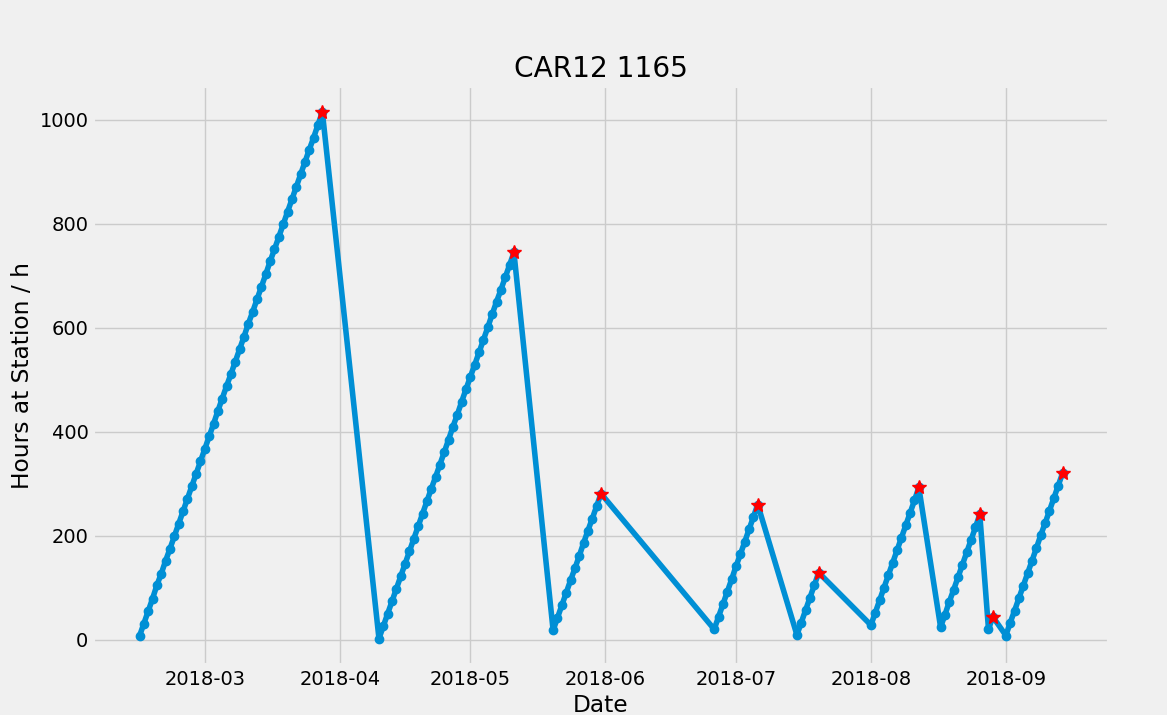

Text(0.5,1,'CAR12 1165')

In [204]:
fig,ax = plt.subplots()
i=50
ax.plot(df_equips[i]['Create Date'],df_equips[i]['Hours at Station'], marker = 'o')
ax.plot(df_max_ts[i],df_maxs[i], marker='*', linestyle = 'None', color = 'r', markersize = 10)

ax.set_xlabel('Date')
ax.set_ylabel('Hours at Station / h')
ax.set_title(list(df_equips[i]['Equipment ID'])[-1])

In [74]:
equip_id_series = pd.DataFrame()
equip_date_series = pd.DataFrame()
equip_kind_series = pd.DataFrame()
equip_maxh_series = pd.DataFrame()
equip_idx_series = pd.DataFrame()
for df_max_t,df_max_kind,df_max_id,df_max,df_max_idx in zip(df_max_ts,df_max_kinds,df_max_ids,df_maxs,df_max_idxs):
    equip_id_series = pd.concat([equip_id_series,df_max_id])
    equip_date_series = pd.concat([equip_date_series,df_max_t])
    equip_kind_series = pd.concat([equip_kind_series,df_max_kind])
    equip_maxh_series = pd.concat([equip_maxh_series,df_max])
    equip_idx_series = pd.concat([equip_idx_series,df_max_idx])

In [84]:
df_max_hours = pd.DataFrame({'EQUIP_ID':equip_id_series[0],'KIND':equip_kind_series[0],'MAX_HOURS_AT_STATION':equip_maxh_series[0],'DEPART_DATE':equip_date_series[0]})
df_max_hours

,EQUIP_ID,KIND,MAX_HOURS_AT_STATION,DEPART_DATE
3,CAR1 0594,B,96.0,2018-08-20
9,CAR1 0594,B,112.0,2018-09-16
12,CAR1 1109,B,53.0,2018-09-23
17,CAR1 1385,B,112.0,2018-09-20
18,CAR1 1385,B,0.0,2018-09-21
37,CAR1 1387,B,441.0,2018-08-02
39,CAR1 1387,B,49.0,2018-08-17
41,CAR1 1387,B,28.0,2018-08-23
46,CAR1 1824,B,116.0,2018-09-23
53,CAR1 1830,B,168.0,2018-08-23


In [91]:
gb_max_hours = df_max_hours.groupby('KIND')

<IPython.core.display.Javascript object>


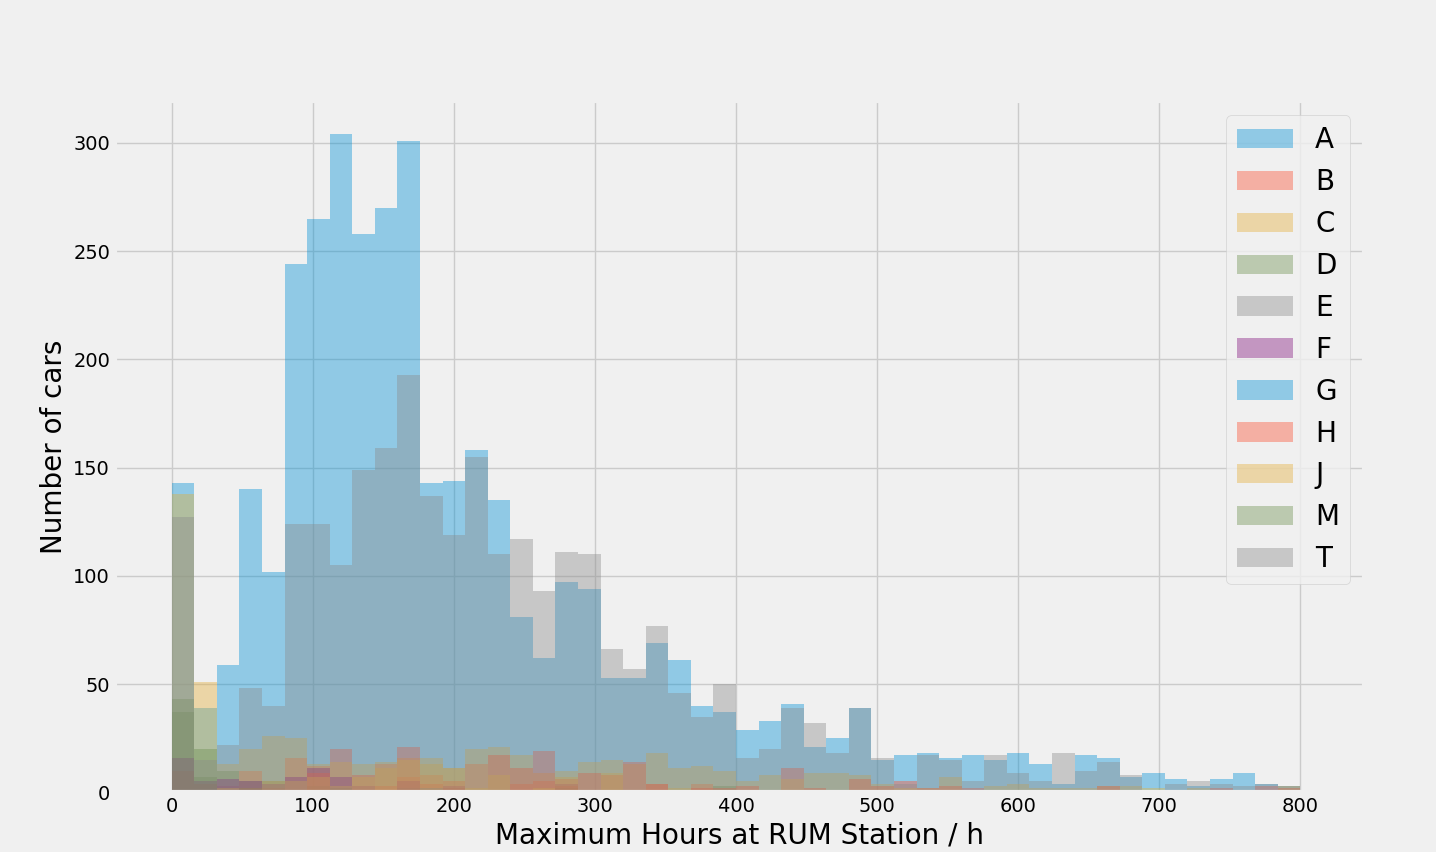

C:\Users\Lenovo Thinkpad W520\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Lenovo Thinkpad W520\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Lenovo Thinkpad W520\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Lenovo Thinkpad W520\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users

In [145]:
fig, ax = plt.subplots()

bins = 50
hist_kws = {'range': (0,800)}
fontsize = 20

for kind in gb_max_hours.indices.keys():
    ax = sns.distplot(gb_max_hours.get_group(kind)['MAX_HOURS_AT_STATION'], label = kind, bins = bins, hist_kws = hist_kws, kde = 0, ax=ax)

ax.set_xlabel('Maximum Hours at RUM Station / h',fontsize = fontsize)
ax.set_ylabel('Number of cars',fontsize = fontsize)

leg = ax.legend(fontsize = fontsize)

In [ ]:
df_clean

In [129]:
for kind in gb_max_hours.indices.keys():
    print(kind)
    print(gb_max_hours.get_group(kind)['MAX_HOURS_AT_STATION'].describe())

A
count    3851.000000
mean      226.812776
std       217.923364
min         0.000000
25%       110.000000
50%       166.000000
75%       278.000000
max      5585.000000
Name: MAX_HOURS_AT_STATION, dtype: float64
B
count    163.000000
mean     184.368098
std      140.008728
min        0.000000
25%       91.000000
50%      146.000000
75%      246.500000
max      635.000000
Name: MAX_HOURS_AT_STATION, dtype: float64
C
count     630.000000
mean      199.484127
std       205.289177
min         0.000000
25%        22.000000
50%       148.000000
75%       324.000000
max      1192.000000
Name: MAX_HOURS_AT_STATION, dtype: float64
D
count     110.000000
mean       94.381818
std       196.457992
min         0.000000
25%         7.000000
50%        19.000000
75%        76.000000
max      1486.000000
Name: MAX_HOURS_AT_STATION, dtype: float64
E
count      8.000000
mean     132.750000
std       74.605151
min       43.000000
25%       46.000000
50%      163.000000
75%      193.000000
max      215.0

<IPython.core.display.Javascript object>


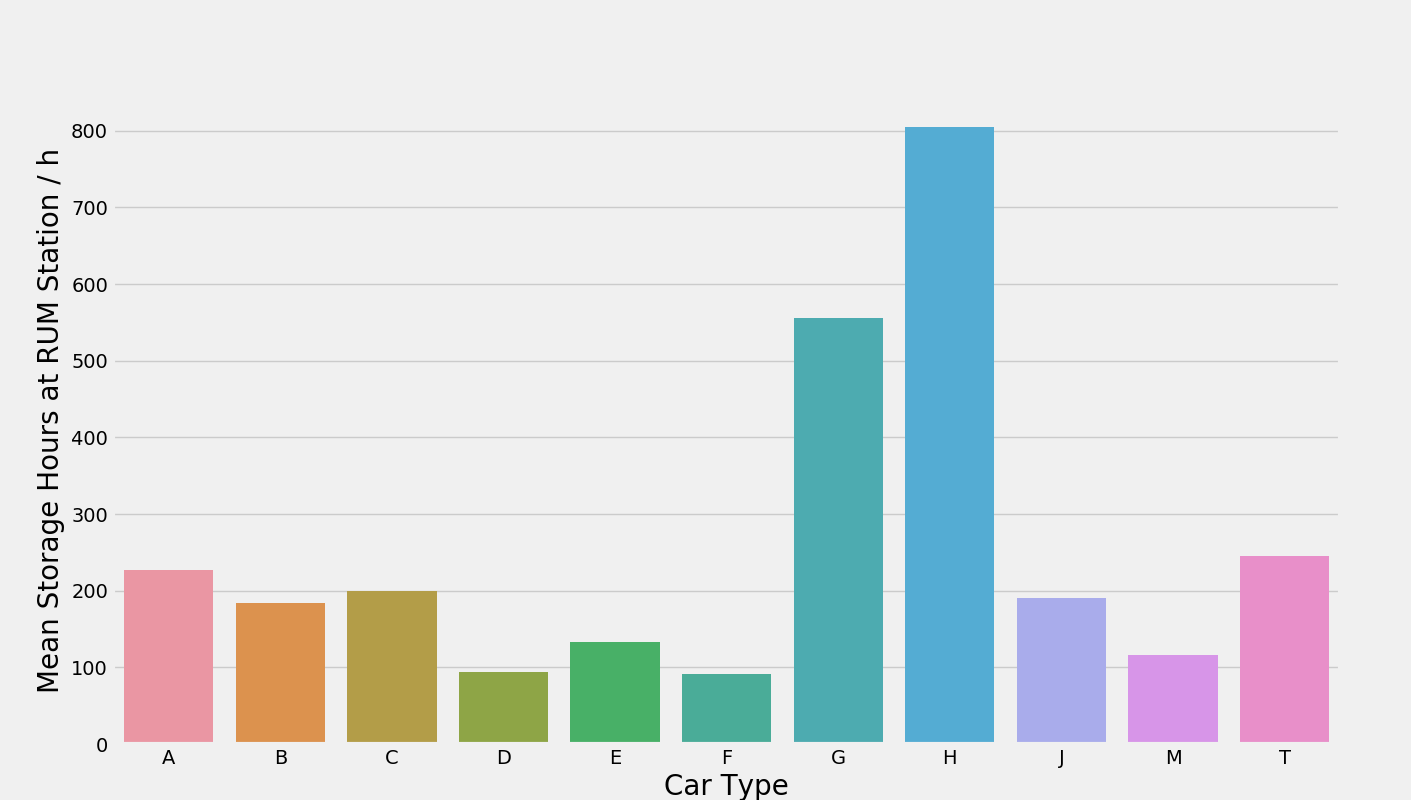

Text(0,0.5,'Mean Storage Hours at RUM Station / h')

In [144]:
fig, ax = plt.subplots()

fontsize = 20

ax = sns.barplot(x = list(gb_max_hours.indices.keys()), y = gb_max_hours['MAX_HOURS_AT_STATION'].mean(), orient = 'v', ax=ax)

ax.set_xlabel('Car Type',fontsize = fontsize)
ax.set_ylabel('Mean Storage Hours at RUM Station / h',fontsize = fontsize)



# Next Steps: 
- Because the data looks pretty flat, is a ML model needed to predict storage times for cars? Would a model do any better than guessing the mean over and over? Try it, but my guess is not.

In [191]:
for kind_1 in df_gb2.indices.keys():
    for kind_2 in df_gb2.indices.keys():
        cove = df_gb2.get_group(kind_1)['count'].corr(other = df_gb2.get_group(kind_2)['count'])
        print(kind_1+':'+kind_2+' = '+str(cove))

A:A = 0.9999999999999999
A:B = nan
A:C = nan
A:D = nan
A:E = nan
A:F = nan
A:G = nan
A:H = nan
A:J = nan
A:M = nan
A:T = nan
B:A = nan
B:B = 1.0
B:C = nan
B:D = nan
B:E = nan
B:F = nan
B:G = nan
B:H = nan
B:J = nan
B:M = nan
B:T = nan
C:A = nan
C:B = nan
C:C = 1.0
C:D = nan
C:E = nan
C:F = nan
C:G = nan
C:H = nan
C:J = nan
C:M = nan
C:T = nan
D:A = nan
D:B = nan
D:C = nan
D:D = 1.0
D:E = nan
D:F = nan
D:G = nan
D:H = nan
D:J = nan
D:M = nan
D:T = nan
E:A = nan
E:B = nan
E:C = nan
E:D = nan
E:E = 1.0
E:F = nan
E:G = nan
E:H = nan
E:J = nan
E:M = nan
E:T = nan
F:A = nan
F:B = nan
F:C = nan
F:D = nan
F:E = nan
F:F = 1.0
F:G = nan
F:H = nan
F:J = nan
F:M = nan
F:T = nan
G:A = nan
G:B = nan
G:C = nan
G:D = nan
G:E = nan
G:F = nan
G:G = 1.0
G:H = nan
G:J = nan
G:M = nan
G:T = nan
H:A = nan
H:B = nan
H:C = nan
H:D = nan
H:E = nan
H:F = nan
H:G = nan
H:H = 1.0
H:J = nan
H:M = nan
H:T = nan
J:A = nan
J:B = nan
J:C = nan
J:D = nan
J:E = nan
J:F = nan
J:G = nan
J:H = nan
J:J = 1.0
J:M = nan
J:T =

<IPython.core.display.Javascript object>


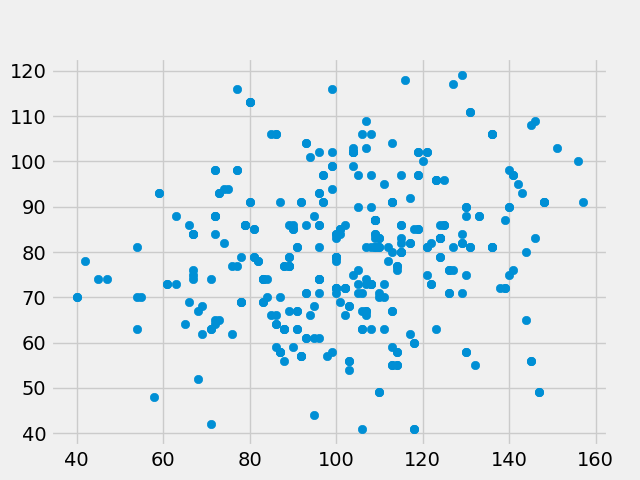

In [192]:
fig,ax = plt.subplots()

kind_1 = 'A'
kind_2 = 'B'

ax.scatter(df_gb2.get_group(kind_1)['count'],df_gb2.get_group(kind_2)['count'])

In [82]:
all_kinds = []
all_max_hours = []

for df_max_kind in df_max_kinds:
    all_kinds = all_kinds+df_max_kind

for df_max in df_maxs:
    all_max_hours = all_max_hours+df_max

df_kind_max = pd.DataFrame({'kind':all_kinds,'max_hours':all_max_hours})
df_kind_max

ValueError: operands could not be broadcast together with shapes (0,) (2,) 

In [44]:
len(df['Create Date'].unique())

365

In [47]:
len(df['Equipment ID'].unique())

2899

In [ ]:
df_gb_car_type = df.groupby('Equipment ID')['Hours at Station']

In [45]:
df['AAR Car Kind'].unique()

array(['B', 'C', 'A', 'D', 'H', ' ', 'G', 'M', 'T', 'F', 'J', 'E'],
      dtype=object)

<IPython.core.display.Javascript object>


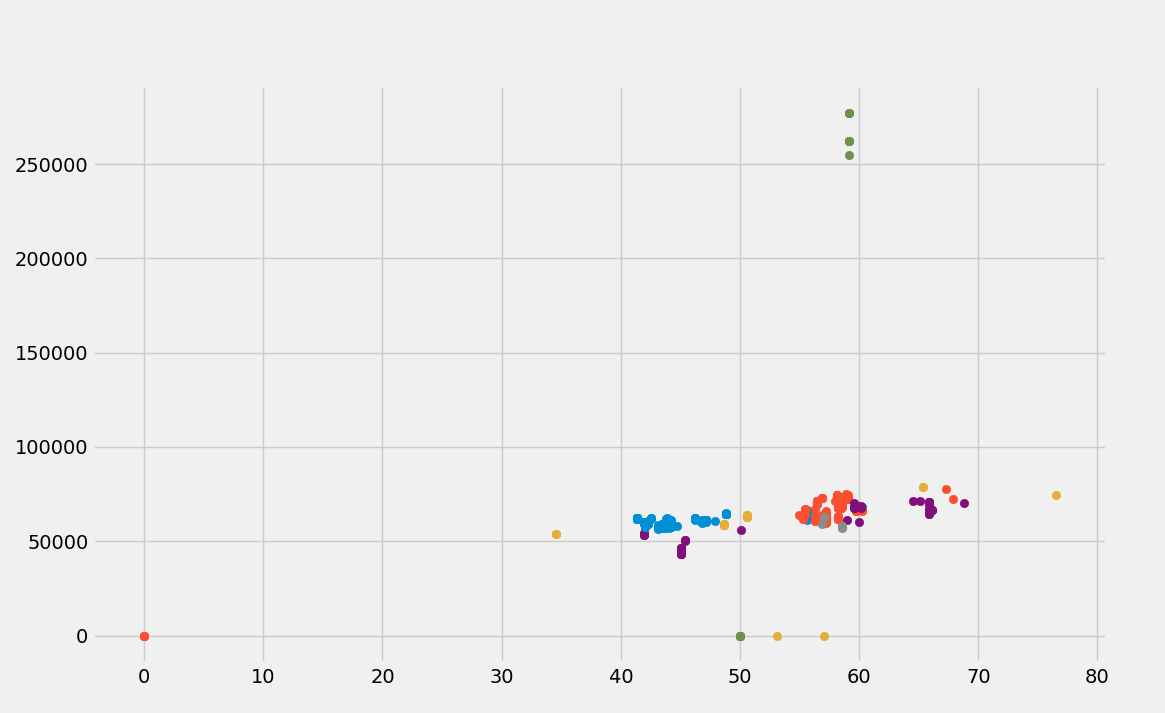

In [42]:
fig, ax = plt.subplots()
df['Length_ft'] = df['Feet']+df['Inches']/12
df['Gross_wt'] = df['Weight']+df['Tare Weight']

df_ds = df[::80]
df_by_types = []
for car_type in df_ds['AAR Car Kind'].unique():
    df_by_types.append(df_ds[df_ds['AAR Car Kind']==car_type])

cp = sns.color_palette()
i=0 
for df_car in df_by_types:
    if i < len(cp):
        ax.scatter(df_car['Length_ft'],df_car['Tare Weight'],color = cp[i])
        i=i+1
    else:
        i=0
        ax.scatter(df_car['Length_ft'],df_car['Tare Weight'],color = cp[i])
        i=i+1

In [ ]:
%matplotlib notebook